In [23]:
%matplotlib inline
from nansat import *
n = Nansat('/files/normap/barents1km_asar_wind_20110930T191057_20110930T191354.nc')
print n

07:58:51|30|mapper_generic|__init__|Use generic mapper - OK!


=>Barents Sea Surface Winds from ASAR<=
----------------------------------------
/files/normap/barents1km_asar_wind_20110930T191057_20110930T191354.nc
----------------------------------------
Mapper: generic
----------------------------------------
Band : 1 mask
  _FillValue: 0
  grid_mapping: stereographic
  name: mask
  long_name: Status flag for wind speed retrieval
  dataType: 1
  valid_range: {0,255}
  flag_meanings: no_data clouds land nominal 
  standard_name: northward_wind status_flag
  flag_values: {0,1,2,64}
  SourceFilename: NETCDF:"/files/normap/barents1km_asar_wind_20110930T191057_20110930T191354.nc":mask
  NETCDF_DIM_time: 40814.79927083333
  SourceBand: 1
  wkv: northward_wind status_flag
Band : 2 V
  _FillValue: -10000
  grid_mapping: stereographic
  scale_factor: 0.0099999998
  colormap: jet
  short_name: V
  dataType: 6
  add_offset: 0
  long_name: Northward wind velocity
  standard_name: northward_wind
  wkv: northward_wind
  units: m s-1
  SourceFilename: NETCDF:"/

In [30]:
n.undo(100)
n.crop(0, 0, 400, 600)
u = n['U']
v = n['V']
mask = n.vrt.dataset.GetRasterBand(1).ReadAsArray()
u[mask<64]=np.nan
v[mask<64]=np.nan


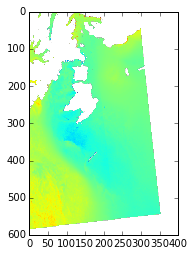

In [31]:
plt.imshow(u)

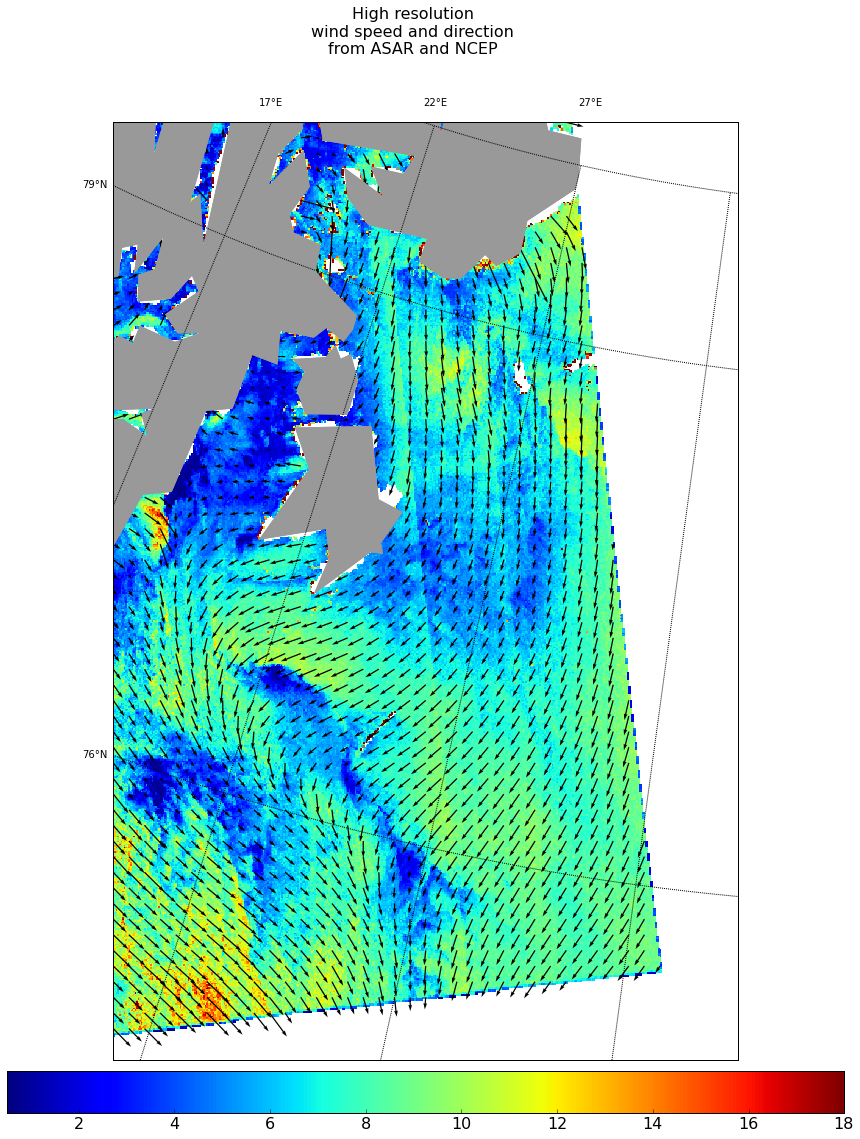

In [51]:
nmap = Nansatmap(n, resolution='l')

nmap.pcolormesh(np.hypot(u,v), vmax=18)
nmap.add_colorbar(fontsize=16)
nmap.quiver(u, v, step=10, scale=300, width=0.002)
nmap.draw_continents()
nmap.drawmeridians(np.arange(12, 53, 5), labels=[False,False,True,False])
nmap.drawparallels(np.arange(67, 80, 3), labels=[True, False, False, False])

# set size of the figure (inches)
nmap.fig.set_figheight(20)
nmap.fig.set_figwidth(15)

# save figure to a PNG file
nmap.draw_continents()
plt.suptitle('High resolution\nwind speed and direction\nfrom ASAR and NCEP', fontsize=16)
nmap.fig.savefig('normap_asar_wind.png', bbox_inches='tight')